# Welcome to machine learning.
[The reason I got into ML](https://youtu.be/A0lDWZ_DQ-M?t=1207)

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


# Helper function to split our data
from sklearn.model_selection import train_test_split


# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

In [2]:
# Load data
df = pd.read_csv('data/titanic.csv')

# Display data
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>


# Inspect and Explore EDA
1. Shape and size
1. Describe
1. Info
1. Check for nulls
1. Check for dupes
1. Plot

In [3]:
# Changing the values of the target variable for easier understanding:
df['survived'] = df['survived'].map( {0: 'died', 1: 'survived' })

In [4]:
# 1. Shape and size
print(df.shape)

(891, 12)


In [5]:
# 2. Describe
df.describe()

,passengerid,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 3. Get info on cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    object 
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


## Inspect null values.
* What does this tell us about features we should and should not use. 

In [7]:
# Inspect / check for nulls.
df.isnull().sum() 

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [8]:
# Percentage of null values per columns
((df.isnull().sum() / len(df)) * 100).round(2)

passengerid     0.00
survived        0.00
pclass          0.00
name            0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
ticket          0.00
fare            0.00
cabin          77.10
embarked        0.22
dtype: float64

## Inspect duplicate rows.
* Phew...

In [9]:
n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)

Number of duplicate rows are 0.


# Visualize our data

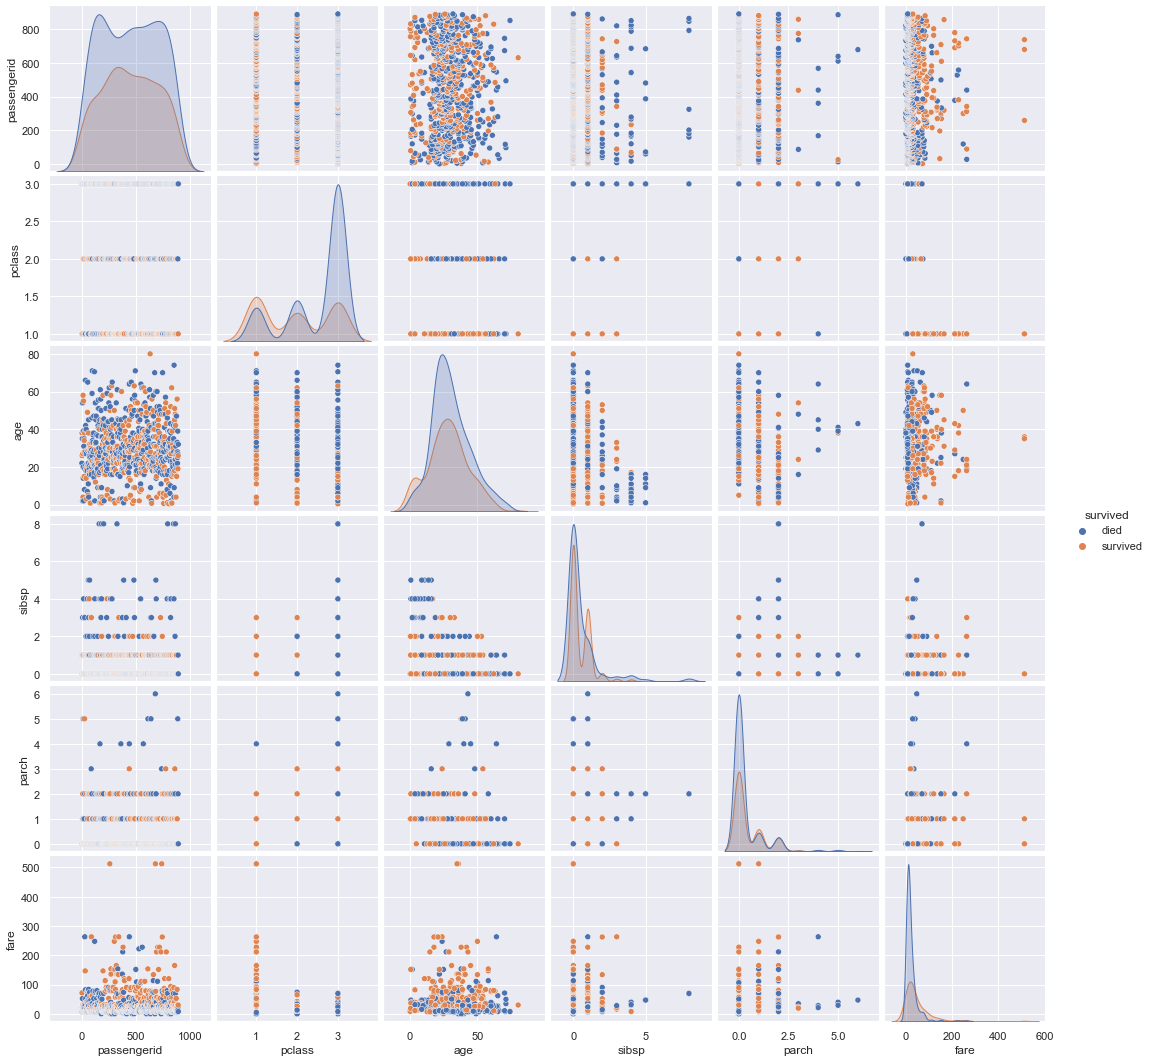

In [10]:
sns.pairplot(df, hue='survived');

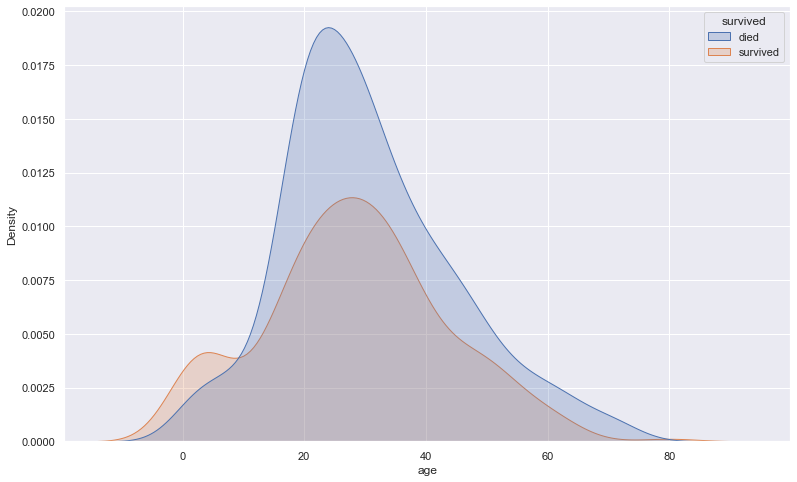

In [11]:
plt.figure(figsize=(13,8))
sns.kdeplot(data=df,x='age', hue='survived', shade=True)

# Feature Engineering
1. Select the features you are going to want to use to predict survived. 
    * For this first example we are only going to be selecting `fare, sex, and pclass`
    * Don't use features that have nulls in them. 
1. Convert categorical variables into numerical. 
    * Use helper function `pd.get_dummies()` for this 
1. Split into test and train. 

In [12]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.survived.value_counts()

died        549
survived    342
Name: survived, dtype: int64

In [14]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [15]:
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

### Convert categorical variables into numerical.
* `pd.get_dummies()` is a very helpful function that converts our categorical variables into continuous variables. 

In [16]:
df = pd.get_dummies(df, columns=['sex', 'pclass'], drop_first=True)
df.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male,pclass_2,pclass_3
0,1,died,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,survived,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,survived,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,survived,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0
4,5,died,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [17]:
selected_features = ['fare', 'pclass_2', 'pclass_3', 'sex_male']

### Defining our X and y
* It is industry standard to name your feature matrix as `X`, and your target variable as `y`

In [18]:
X = df[selected_features].values
y = df['survived'].values

### Splitting our data into training and testing batches.


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Lenght of our Training data:', len(X_train), '\nLength of our Testing data:', len(X_test))

Lenght of our Training data: 712 
Length of our Testing data: 179


# Build and train our model
* Initalize an empty model
* Train our model using our `model.fit()` with our training data 

In [20]:
from sklearn.linear_model import LogisticRegression

# Initalize our model.  
# This will create an empty untrained Logistic Regression model.
model = LogisticRegression()

print(type(model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


# This is the heart of our ML process. 
This steps fits (aka trains) our model with our training data.

In [21]:
# !! THIS HAPPENS 'IN PLACE', MEANING IT DOESN'T RETURN ANYTHING !!
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Make new predicitions
y_pred = model.predict(X_test)
y_pred

array(['died', 'died', 'survived', 'died', 'survived', 'survived', 'died',
       'died', 'died', 'died', 'died', 'died', 'died', 'survived', 'died',
       'died', 'died', 'died', 'died', 'died', 'died', 'died', 'died',
       'survived', 'survived', 'died', 'died', 'died', 'died', 'died',
       'died', 'died', 'died', 'died', 'died', 'died', 'survived',
       'survived', 'died', 'survived', 'survived', 'died', 'died', 'died',
       'died', 'died', 'survived', 'died', 'survived', 'died', 'survived',
       'died', 'survived', 'survived', 'died', 'died', 'survived',
       'survived', 'survived', 'died', 'died', 'survived', 'died', 'died',
       'died', 'survived', 'died', 'died', 'died', 'died', 'died', 'died',
       'died', 'died', 'died', 'died', 'died', 'died', 'survived',
       'survived', 'died', 'died', 'died', 'died', 'died', 'survived',
       'survived', 'died', 'survived', 'survived', 'died', 'died',
       'survived', 'died', 'died', 'died', 'died', 'survived', 'died'

In [23]:
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba

array([0.40798972, 0.11541112, 0.78669621, 0.13230995, 0.61328755,
       0.88586817, 0.1150296 , 0.115203  , 0.11529392, 0.11549665,
       0.11568311, 0.11522918, 0.24816169, 0.77934234, 0.115203  ,
       0.11522918, 0.11525259, 0.11524293, 0.39470446, 0.38759076,
       0.11529392, 0.11519474, 0.240677  , 0.89345672, 0.59285846,
       0.25472204, 0.11524293, 0.11396529, 0.11572458, 0.11529392,
       0.11502273, 0.1150296 , 0.40841724, 0.11798319, 0.27799599,
       0.12202331, 0.60160024, 0.54399169, 0.12202331, 0.91390484,
       0.59264322, 0.11519474, 0.12072662, 0.11577436, 0.1150296 ,
       0.1151617 , 0.8873027 , 0.2409734 , 0.91261307, 0.4225114 ,
       0.59272478, 0.115203  , 0.89789474, 0.60374839, 0.24816169,
       0.1150296 , 0.89327654, 0.88524381, 0.79505012, 0.11519474,
       0.12877863, 0.88072147, 0.11525259, 0.11529392, 0.11560849,
       0.90362505, 0.11524293, 0.24038084, 0.12877863, 0.11505023,
       0.11519474, 0.39404944, 0.23890379, 0.11532975, 0.39045

In [24]:
pred_df = pd.DataFrame.from_dict( {'y_true': y_test, 'y_pred': y_pred, 'probability': y_pred_proba} )
pred_df

,y_true,y_pred,probability
0,survived,died,0.407990
1,died,died,0.115411
2,survived,survived,0.786696
3,died,died,0.132310
4,died,survived,0.613288
...,...,...,...
174,died,died,0.240381
175,survived,died,0.116766
176,survived,died,0.114939
177,survived,survived,0.790480


# Evaluate our model.

# Accuracy, our first look.
Is the percent of predicitions we got correct.
Good for general scoring, but bad in terms of when classes are imbalanced. 


In [25]:
# Helper fuctions to evaluate our model. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.826816


# Precision
Out of all the times the MODEL says 'yes' what was the precentage it was correct. 
* The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative. 
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
* If you want to raise precision (ie; only say yes when you are absolutely sure), raise your classification threshold.

In [26]:
precision = precision_score(y_test, y_pred, pos_label='survived')
print("Precision Score: %f" % precision)
print("In other words, when the model predicts someone survived, it is correct %f of the time." % precision)

Precision Score: 0.738462
In other words, when the model predicts someone survived, it is correct 0.738462 of the time.


# Recall
Out of all the times the ACTUAL is 'yes', how many did you get correct.  

Having high recall is important when the cost of missing a True Positive is high.  

For example, if you're detecting cancer.  Saying, you don't have cancer when you really do is really bad. Therefore, if you're building a model to detect cancer, you should optimize for having high recall.  You can do that by lowering your classification threshold. 

* The recall is intuitively the ability of the classifier to find all the positive samples.
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
* if you want to raise recall, lower your classification threshold

In [27]:
recall = recall_score(y_test, y_pred, pos_label='survived')
print("Recall Score: %f" % recall)
print("In other words, it correctly identifies %f percent of all survivors" % recall)

Recall Score: 0.774194
In other words, it correctly identifies 0.774194 percent of all survivors


In [28]:
from sklearn.metrics import f1_score

# F1 Score
f1_score(y_test, y_pred, pos_label='survived')

0.7559055118110236

* Confustion Matrix
    * TP - When you say yes and actual is yes.
    * FP - When you say yes and actual is no.
    * FN - When you say no and actual is yes.
    * TN - WHen you say no and actual is no. 


true-negitive: 100 
false-positive: 17 
false-negative: 14 
true-positive: 48


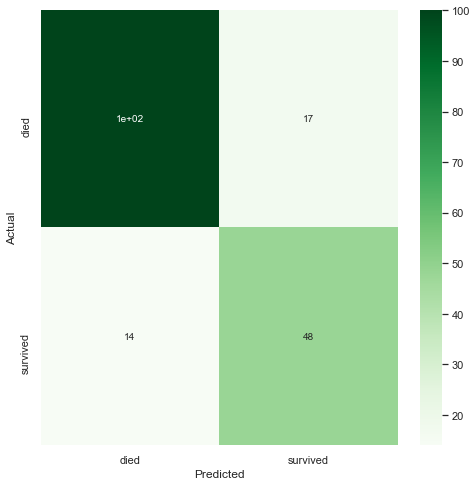

In [29]:
labels=['died', 'survived']

cm = confusion_matrix(y_test, y_pred, labels=['died', 'survived'])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=['died', 'survived']).ravel()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )